# Lab01 - Introduction to PyTorch (Solution)

Tensor (`torch.tensor`) is the data structure used in PyTorch to build a deep learning system. Tensors are similar to NumPy's `ndarrays`, with the addition being that Tensors can also be used on a GPU to accelerate computing.

### Objectives:
In this lab, you learn how to
* Create tensors in PyTorch
* Perform mathematical operation on tensors
* Convert between PyTorch tensor and Numpy array
* Reshape a PyTorch tensor
* Transfer tensor to and from GPU

#### Table of Content:
1. [Creating tensors](#1.-Creating-tensors)
2. [Tensor operations](#2.-Tensor-Operations)
3. [Indexing](#3.-Indexing)
4. [Reshaping tensors](#4.-Reshaping-Tensors)
5. [CUDA Tensors](#6.-CUDA-Tensors)
6. [Exercise](#Exercise)

#### Reference:

* [PyTorch Official Tutorial: What is PyTorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
---

In [2]:
import torch

## 1. Creating tensors

Create with some predefined value and the data type is `torch.float32`.

In [2]:
x = torch.tensor(((1., 2., 3.),
                 (4., 5., 6.)))

# print the value of x
print(x)

# print the dtype of x
print(x.dtype)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.float32


Create with some predefined value and the data type is `torch.int64`.

In [9]:
x = torch.tensor(((1, 2, 3),
                  (4, 5, 6),
                  (7, 8, 9),
                  (10, 11, 12)))

# print the value of x
print(x)

# print the dtype of x
print(x.dtype)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.int64


Construct a matrix filled with zeros and explicitly specify the data type as int32

In [4]:
x = torch.zeros((5, 6), dtype=torch.int32)
print(x)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)


Construct a matrix filled with ones and of dtype float64

In [5]:
x = torch.ones((5, 10), dtype=torch.float64)
print(x)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float64)


Construct a tensor filled with random numbers from a uniform distribution on the interval `[0, 1)`.

In [6]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6844, 0.1682, 0.5901],
        [0.3967, 0.7415, 0.3008],
        [0.8614, 0.8135, 0.8680],
        [0.4247, 0.4617, 0.7758],
        [0.8205, 0.0662, 0.4333]])


Construct a tensor filled with random numbers from a normal distribution with mean 0 and variance 1.

In [7]:
x = torch.randn(5, 3)
print(x)

tensor([[-0.2885, -0.1540, -0.6949],
        [ 0.5614,  1.0440,  0.0527],
        [ 0.5118, -0.9583,  0.5176],
        [-0.8155,  1.6021, -1.2024],
        [ 0.0619, -0.1174,  1.6865]])


Construct a tensor filled with integers ranging from 0 to 9 with a shape of (5, 3). The 1st argument is the starting index (inclusive), the 2nd argument is the ending index (exclusive), and the third argument is a tuple specifying the targeted shape.

In [8]:
x = torch.randint(0, 10, (5, 3))
print(x)

tensor([[8, 4, 0],
        [6, 7, 3],
        [8, 0, 3],
        [5, 5, 8],
        [3, 7, 7]])


---
## 2. Tensor Operations

#### Size of tensors

You can print the shape of tensors by either using the attribute `.shape` or the function `.size()`.

In [10]:
x = torch.rand(5, 3)
print('x:\n', x)
print('Shape of x:', x.size())
print('Shape of x:', x.shape)

x:
 tensor([[0.0917, 0.2887, 0.8780],
        [0.3249, 0.8842, 0.0770],
        [0.7572, 0.8423, 0.0609],
        [0.1421, 0.0102, 0.1187],
        [0.3846, 0.4280, 0.6288]])
Shape of x: torch.Size([5, 3])
Shape of x: torch.Size([5, 3])


#### Element-wise operations

In PyTorch, many operations, e.g., `*`, `+`, `/`, `torch.exp`, `torch.log`, etc., are basically element-wise operations of two arrays with the **same** shape. E.g., element-wise multiplication multiplies the items at the corresponding location.

The following shows different ways of performing multiplication

In [11]:
a = torch.randint(0, 10, (5,))
print('a:\n', a)

b = torch.randint(0, 10, (5,))
print('b:\n', b)
print('---------------------------')

### --- the * operator  ---
out = a * b
print('a * b:\n', out)

### --- torch.multiply ---
out = torch.multiply(a, b)
print('\ntorch.multiply:\n', out)


### --- <tensor>.multiply ---
out = a.multiply(b)
print('\na.multiply(b):\n', out)


### --- inplace operations ---
b.multiply_(a)
print('\nInplace multiplication:')
print('a:', a)
print('b:', b)

a:
 tensor([4, 8, 0, 3, 9])
b:
 tensor([1, 9, 9, 1, 6])
---------------------------
a * b:
 tensor([ 4, 72,  0,  3, 54])

torch.multiply:
 tensor([ 4, 72,  0,  3, 54])

a.multiply(b):
 tensor([ 4, 72,  0,  3, 54])

Inplace multiplication:
a: tensor([4, 8, 0, 3, 9])
b: tensor([ 4, 72,  0,  3, 54])


Examples of other binary operations:

In [13]:
a = torch.randint(1, 10, (5,))
print('a:\n', a)

b = torch.randint(1, 10, (5,))
print('b:\n', b)
print('-------------------------')

# --- addition ---
out = a + b
print('a + b:\n', out)

# --- subtraction ---
out = a - b
print('a - b:\n', out)

# --- multiplication ---
out = a * b
print('a * b:\n', out)

# --- division ---
out = a / b
print('a / b:\n', out)

# --- floor division ---
out = a // b
print('a // b:\n', out)

# --- power ---
out = a ** b
print('a ^ b:\n', out)

# --- modulus ---
out = a % b
print('a % b:\n', out)

a:
 tensor([4, 5, 2, 3, 3])
b:
 tensor([4, 1, 7, 1, 8])
-------------------------
a + b:
 tensor([ 8,  6,  9,  4, 11])
a - b:
 tensor([ 0,  4, -5,  2, -5])
a * b:
 tensor([16,  5, 14,  3, 24])
a / b:
 tensor([1.0000, 5.0000, 0.2857, 3.0000, 0.3750])
a // b:
 tensor([1, 5, 0, 3, 0])
a ^ b:
 tensor([ 256,    5,  128,    3, 6561])
a % b:
 tensor([0, 0, 2, 0, 3])


Examples of unary operations:

In [14]:
a = torch.rand(2, 3)
print('a:\n', a)
print('-----------------------------------------')

# --- exponent ---
out = a.exp()
print('exponent of a:\n', out)

# --- ln ---
out = a.log()
print('\nln of a:\n', out)

# --- log base 10 ---
out = a.log10()
print('\nlog base 10 of a:\n', out)

# --- sum ---
out = a.sum()
print('\nsum of a:', out)

# --- mean ---
out = a.mean()
print('\nmean of a:', out)

# --- max ---
out = a.max()
print('\nmax of a:', out)

# --- min ---
out = a.min()
print('\nmin of a:', out)

a:
 tensor([[0.9505, 0.4470, 0.1872],
        [0.8880, 0.7985, 0.3889]])
-----------------------------------------
exponent of a:
 tensor([[2.5871, 1.5636, 1.2059],
        [2.4303, 2.2222, 1.4754]])

ln of a:
 tensor([[-0.0507, -0.8052, -1.6757],
        [-0.1188, -0.2251, -0.9444]])

log base 10 of a:
 tensor([[-0.0220, -0.3497, -0.7277],
        [-0.0516, -0.0977, -0.4101]])

sum of a: tensor(3.6601)

mean of a: tensor(0.6100)

max of a: tensor(0.9505)

min of a: tensor(0.1872)


For `sum`, `mean`, `max` and `min` operations, we can perform the operation on a particular dimension rather than on the whole tensor.

In [16]:
a = torch.randn(2, 3)
print('a:\n', a)
print('-----------------------------------------')

# values, indices = ... get the max value of each row ...
values, indices = a.max(dim=1)
print('\nMax value in each row:', values)
print('Indices of the max value in each row:', indices)

# values, indices = ... get the min value of each colum ...
values, indices = a.max(dim=0)
print('\nMax value in each col:', values)
print('Indices of max value in each col:', indices)

a:
 tensor([[-1.9404, -1.1815,  0.0030],
        [ 0.5632, -0.2074,  2.0882]])
-----------------------------------------

Max value in each row: tensor([0.0030, 2.0882])
Indices of the max value in each row: tensor([2, 2])

Max value in each col: tensor([ 0.5632, -0.2074,  2.0882])
Indices of max value in each col: tensor([1, 1, 1])


### To perform element-wise operations, the `shape / size` of the tensors must be the **same**.

#### Broadcasting
Broadcasting allows element-wise operations on tensors that are not of the same size. Pytorch automatically broadcast the *smaller* tensor to the size of the *larger* tensor, if certain constraints are met.

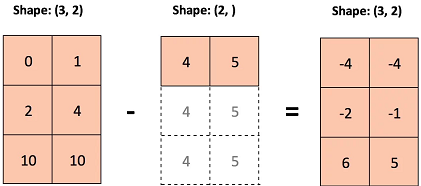

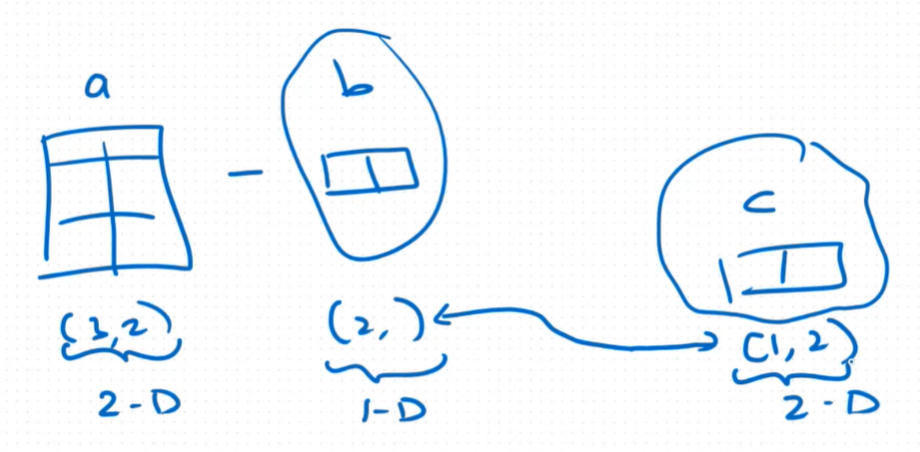

## Broadcasting will convert a 1D tensor to 2D tensor (dim0 - row by default)
Exp: (2 will be treated as dim0)

(2,) -> (1, 2)

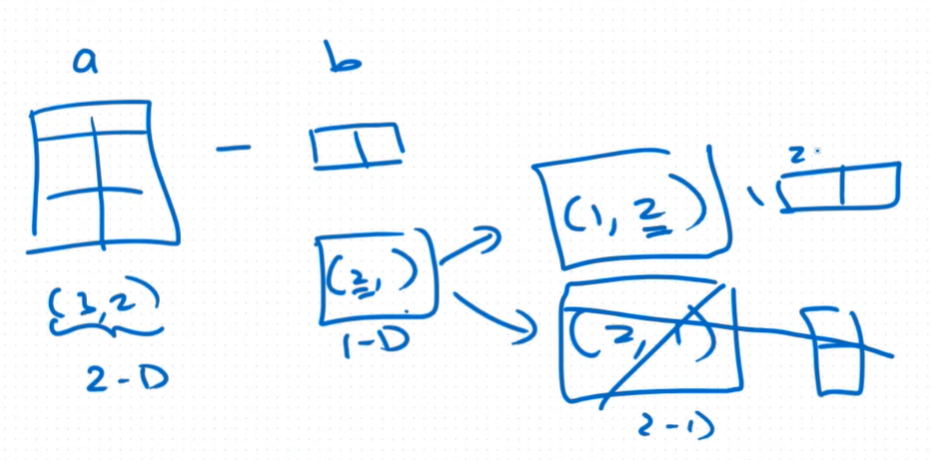

In [21]:
a = torch.randint(0, 10, (3, 2))
print('a:\n', a)

# b = torch.randint(0, 10, ...)
b = torch.randint(0, 10, (2,))  # 1-D --> convert to 2-D where shape = (1, 2)
print('b:\n', b)

# c = ... broadcast subtraction ...
c = a - b
print('\na - b:\n', c)

a:
 tensor([[6, 7],
        [4, 7],
        [7, 0]])
b:
 tensor([5, 3])

a - b:
 tensor([[ 1,  4],
        [-1,  4],
        [ 2, -3]])


In [20]:
a = torch.randint(0, 10, (3, 2))
print('a:\n', a)

# b = torch.randint(0, 10, ...)
b = torch.randint(0, 10, (1, 2))
print('b:\n', b)

# c = ... broadcast subtraction ...
c = a - b
print('\na - b:\n', c)

a:
 tensor([[8, 6],
        [8, 0],
        [5, 3]])
b:
 tensor([[4, 4]])

a - b:
 tensor([[ 4,  2],
        [ 4, -4],
        [ 1, -1]])


The dimensions must be compatible for broadcasting to work. Here, since the 1st dimension of the two tensors are not the same, broadcasting cannot be performed.

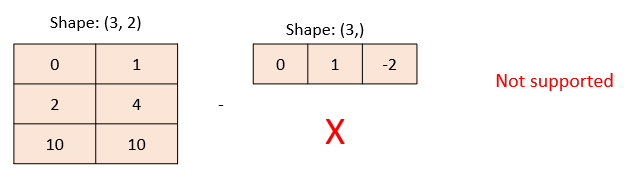

In [22]:
# a = torch.randint(0, 10, ...)
a = torch.randint(0, 10, (3, 2))  # shape (3, 2)
print('a:\n', a)

# b = torch.randint(0, 10, ...)
b = torch.randint(0, 10, (3,))   # convert to shape (1, 3)
print('b:\n', b)

# c = ... try to broadcast subtraction but unsuccessful ...
c = a - b
print('\na - b:\n', c)

a:
 tensor([[7, 5],
        [0, 9],
        [3, 7]])
b:
 tensor([6, 4, 2])


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

To overcome above problem, ensure that the two tensors have the same dimensions where  the number of elements set for the dimensions targeted for broadcasting set to 1.

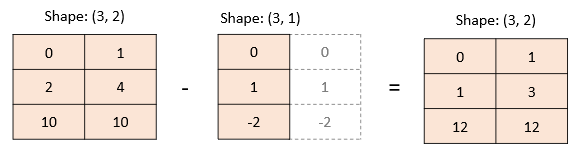

In [23]:
# a = torch.randint(0, 10, ...)
a = torch.randint(0, 10, (3, 2))
print('a:\n', a)

# b = torch.randint(0, 10, ...)
b = torch.randint(0, 10, (3, 1))
print('b:\n', b)

# c = ... broadcast subtraction for dimensions with num_elements = 1 ...
c = a - b
print('\na - b:\n', c)

a:
 tensor([[5, 3],
        [1, 2],
        [9, 2]])
b:
 tensor([[4],
        [1],
        [9]])

a - b:
 tensor([[ 1, -1],
        [ 0,  1],
        [ 0, -7]])


#### Matrix operations

*Matrix operations* are different from *element-wise operation* where the former is based on the rules of linear algebra. Different from numpy, the `dot` command is used only to perform dot product (`dot`). To perform the tensor multiplication of tensors with different dimensions, use the command `matmul` or the `@` operator.

In [24]:
vec1 = torch.randn(2, )
print('vec1', vec1)

vec2 = torch.randn(2, )
print('vec3', vec2)

mat1 = torch.randn(3, 2)
print('mat1', mat1)

mat2 = torch.randn(2, 4)
print('mat2', mat2)

vec1 tensor([ 0.9290, -0.1097])
vec3 tensor([-2.2715,  0.1589])
mat1 tensor([[-0.4902,  0.5334],
        [ 0.6171,  1.1728],
        [ 0.5440, -0.2860]])
mat2 tensor([[ 1.8532,  0.7939, -0.5226,  0.6811],
        [ 0.4177,  1.2221,  0.9919,  1.8595]])


**`dot`**

This function can only perform vector-vector multiplication in PyTorch.

In [25]:
# out = ... multiply vec1 and vec2 ...  # ok, dot can be used to perform dot product of two vectors
out = torch.dot(vec1, vec2)
print('out =', out)

out = tensor(-2.1277)


In [26]:
# out = ... try use do tto multiply mat1 and vec1 (error) ...  # not ok, dot function cannot perform tensor multiplication.
out = torch.dot(mat1, vec1)
print('out =', out)

RuntimeError: 1D tensors expected, but got 2D and 1D tensors

**`matmul`**

In [27]:
# out1 = ... mult vec1 and vec2 ...  # vector-vector multiplication (dot product)
out1 = torch.matmul(vec1, vec2)
print('out1\n', out1)

# out2 = ... mult mat1 and vec1 ...  # matrix-vector multiplication
out2 = torch.matmul(mat1, vec1)
print('out2\n', out2)

# out3 = ... mult mat1 and mat2 ...  # matrix-matrix multiplication
out3 = torch.matmul(mat1, mat2)
print('out3\n', out3)

out1
 tensor(-2.1277)
out2
 tensor([-0.5139,  0.4447,  0.5367])
out3
 tensor([[-0.6856,  0.2627,  0.7853,  0.6579],
        [ 1.6335,  1.9232,  0.8408,  2.6011],
        [ 0.8886,  0.0824, -0.5680, -0.1613]])


The `@` operator

In [28]:
# out1 = ... mult vec1 and vec2 ...    # vector-vector multiplication (dot product)
out1 = vec1 @ vec2
print('out1\n', out1)

# out2 = ... mult mat1 and vec1 ...    # matrix-vector multiplication
out2 = mat1 @ vec1
print('out2\n', out2)

# out3 = ... mult mat1 and mat2 ...    # matrix-matrix multiplication
out3 = mat1 @ mat2
print('out3\n', out3)

out1
 tensor(-2.1277)
out2
 tensor([-0.5139,  0.4447,  0.5367])
out3
 tensor([[-0.6856,  0.2627,  0.7853,  0.6579],
        [ 1.6335,  1.9232,  0.8408,  2.6011],
        [ 0.8886,  0.0824, -0.5680, -0.1613]])


## 3. Indexing

You can use standard Numpy-like indexing with Torch

In [29]:
x = torch.randint(0, 100, (5,10))
print(x)

tensor([[53, 19, 92, 51, 67, 52, 58,  2, 42, 89],
        [18, 64, 35, 68, 61, 81,  8, 37, 33, 15],
        [42, 96, 14, 96, 28,  4, 46, 20, 52, 19],
        [71, 55, 18,  0, 44, 88, 94, 56,  0, 67],
        [ 1, 73, 67, 53, 77, 65, 63, 65, 92, 22]])


### This is **indexing**! (returns `1D tensor`)

In [30]:
# accessing column 1
# print(... indexing of column 1 ...)
print(x[:, 1])

tensor([19, 64, 96, 55, 73])


### This is **slicing**! (returns `2D tensor`)

In [31]:
# accessing column 1
print(x[:, 1:2])

tensor([[19],
        [64],
        [96],
        [55],
        [73]])


In [32]:
# accessing columns 2 and 3
# print(... slicing of columns 2 and 3...)
print(x[:, 2:4])

tensor([[92, 51],
        [35, 68],
        [14, 96],
        [18,  0],
        [67, 53]])


### This is **indexing**! (returns `1D tensor`)

In [33]:
# accessing row 1
# print(.. indexing of row 1 ...)
print(x[1, :])

tensor([18, 64, 35, 68, 61, 81,  8, 37, 33, 15])


### This is **slicing**! (returns `2D tensor`)

In [34]:
# accessing row 1
print(x[1:2, :])

tensor([[18, 64, 35, 68, 61, 81,  8, 37, 33, 15]])


In [35]:
# accessing rows 2 and 3
# print(... slicing of rows 2 and 3 ...)
print(x[2:4, :])

tensor([[42, 96, 14, 96, 28,  4, 46, 20, 52, 19],
        [71, 55, 18,  0, 44, 88, 94, 56,  0, 67]])


In [37]:
# accessing row 2, 3 and column 2, 3, 4
print(x)
print()
print(x[2:4, 2:5])

tensor([[53, 19, 92, 51, 67, 52, 58,  2, 42, 89],
        [18, 64, 35, 68, 61, 81,  8, 37, 33, 15],
        [42, 96, 14, 96, 28,  4, 46, 20, 52, 19],
        [71, 55, 18,  0, 44, 88, 94, 56,  0, 67],
        [ 1, 73, 67, 53, 77, 65, 63, 65, 92, 22]])

tensor([[14, 96, 28],
        [18,  0, 44]])


## 4. Reshaping Tensors

**`Tensor.reshape`**

Returns a tensor with the same data and number of elements as self but with the specified shape.

In [38]:
x = torch.randn(2, 3)
print('x:\n', x)

x:
 tensor([[-0.6920, -0.0471,  1.1358],
        [-0.5090, -1.2378, -0.6500]])


In [39]:
# reshape from (2, 3) to (6, 1)
y = x.reshape(6, 1)
print('y:\n', y)

y:
 tensor([[-0.6920],
        [-0.0471],
        [ 1.1358],
        [-0.5090],
        [-1.2378],
        [-0.6500]])


In [40]:
# Reshape from (2, 3) to (3, 2)
z = x.reshape(3, 2)
print('z:\n', z)

z:
 tensor([[-0.6920, -0.0471],
        [ 1.1358, -0.5090],
        [-1.2378, -0.6500]])


### View vs Copy

This method returns a **view** if shape is compatible with the current shape. Else, it may return a **copy**. This allows it to work with both [contiguous and non-contigous](https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays/26999092#26999092) data. But what is a view or a copy? The following section explains their difference


For example, reshaping on the input tensor directly `y = x.reshape(-1, 1)` returns a **view** of `x`. On the other hand,  reshaping on the transpose of the input tensor `z = x.T.reshape(-1, 1)` returns a **copy** of `x`.

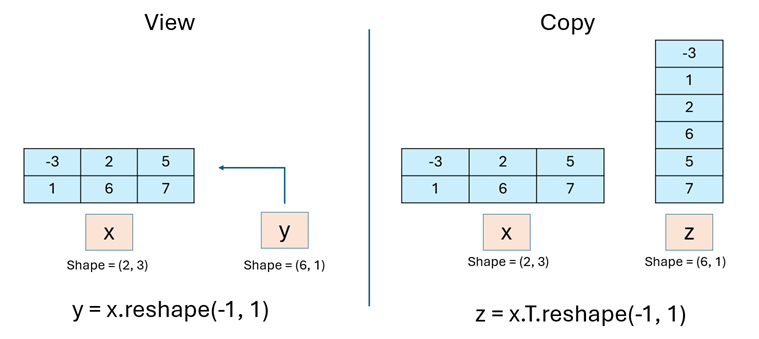

y = x.reshape(-1, 1) -> means PyTorch will compute automatically so that the number of elements in x must be match with y based on the relevant shape when reshape.

Reshaping on the input tensor directly `y = x.reshape(-1, 1)` returns a **view** of `x`. Therefore, changing `x` affects both `x` and `y`, and vice versa.

In [43]:
is_view = x.storage().data_ptr() == y.storage().data_ptr()
print('y is a view of x:', is_view)

y is a view of x: True


In [44]:
x = torch.tensor(((-3, 2, 5), (1, 6, 7)))
y = x.reshape(-1, 1)

print('x:\n', x)
print('y:\n', y)

y[0] = -999

print('\n--- After modifying y ---')
print('x:\n', x)
print('y:\n', y)

x:
 tensor([[-3,  2,  5],
        [ 1,  6,  7]])
y:
 tensor([[-3],
        [ 2],
        [ 5],
        [ 1],
        [ 6],
        [ 7]])

--- After modifying y ---
x:
 tensor([[-999,    2,    5],
        [   1,    6,    7]])
y:
 tensor([[-999],
        [   2],
        [   5],
        [   1],
        [   6],
        [   7]])


Reshaping on the transpose of the input tensor `z = x.T.reshape(-1, 1)` returns a **copy** of `x`. Therefore, changing `x` does not affect `z`, and vice versa.

In [45]:
is_view = x.storage().data_ptr() == z.storage().data_ptr()
print('z is a view of x:', is_view)

z is a view of x: False


In [46]:
x = torch.tensor(((-3, 2, 5), (1, 6, 7)))
z = x.T.reshape(-1, 1)

print('x:\n', x)
print('z:\n', z)

z[0] = -999

print('\n--- After modifying z ---')
print('x:\n', x)
print('z:\n', z)

x:
 tensor([[-3,  2,  5],
        [ 1,  6,  7]])
z:
 tensor([[-3],
        [ 1],
        [ 2],
        [ 6],
        [ 5],
        [ 7]])

--- After modifying z ---
x:
 tensor([[-3,  2,  5],
        [ 1,  6,  7]])
z:
 tensor([[-999],
        [   1],
        [   2],
        [   6],
        [   5],
        [   7]])


### Slicing is another example of view!

In [52]:
A = torch.rand(5, 6)
print("Tensor A:\n", A)

B = A[1:, 2:]  # slicing, B is actually a view of A (any changes on B will affect A)
print("\nTensor B:\n", B)

C = A[1:, 2:].clone()  # C is a copy of A only! (any changes on C will not affect A)
print("\nTensor C:\n", C)

Tensor A:
 tensor([[0.2706, 0.5566, 0.8975, 0.3606, 0.7048, 0.5107],
        [0.8122, 0.0943, 0.1151, 0.0309, 0.9335, 0.2382],
        [0.7410, 0.6782, 0.0572, 0.9442, 0.4658, 0.9946],
        [0.9733, 0.8458, 0.4461, 0.6575, 0.4307, 0.5601],
        [0.9817, 0.0506, 0.8779, 0.6308, 0.4989, 0.9640]])

Tensor B:
 tensor([[0.1151, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])

Tensor C:
 tensor([[0.1151, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])


### Since B is a `view` of A, any changes on B will **affect** A and its view, not copy of A (C)!

In [53]:
B[0, 0] = 0.9999
print("\nTensor A:\n", A)
print("\nTensor B:\n", B)
print("\nTensor C:\n", C)


Tensor A:
 tensor([[0.2706, 0.5566, 0.8975, 0.3606, 0.7048, 0.5107],
        [0.8122, 0.0943, 0.9999, 0.0309, 0.9335, 0.2382],
        [0.7410, 0.6782, 0.0572, 0.9442, 0.4658, 0.9946],
        [0.9733, 0.8458, 0.4461, 0.6575, 0.4307, 0.5601],
        [0.9817, 0.0506, 0.8779, 0.6308, 0.4989, 0.9640]])

Tensor B:
 tensor([[0.9999, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])

Tensor C:
 tensor([[0.1151, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])


### Since C is `copy` of A, any changes on C will **not affect** A and its view (B)!

In [54]:
C[0, 0] = 0.8888
print("\nTensor A:\n", A)
print("\nTensor B:\n", B)
print("\nTensor C:\n", C)


Tensor A:
 tensor([[0.2706, 0.5566, 0.8975, 0.3606, 0.7048, 0.5107],
        [0.8122, 0.0943, 0.9999, 0.0309, 0.9335, 0.2382],
        [0.7410, 0.6782, 0.0572, 0.9442, 0.4658, 0.9946],
        [0.9733, 0.8458, 0.4461, 0.6575, 0.4307, 0.5601],
        [0.9817, 0.0506, 0.8779, 0.6308, 0.4989, 0.9640]])

Tensor B:
 tensor([[0.9999, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])

Tensor C:
 tensor([[0.8888, 0.0309, 0.9335, 0.2382],
        [0.0572, 0.9442, 0.4658, 0.9946],
        [0.4461, 0.6575, 0.4307, 0.5601],
        [0.8779, 0.6308, 0.4989, 0.9640]])


### `Tensor.view`

`Tensor.view` always returns a **view** of the original tensor with the new shape, i.e., it will share the underlying data with the original tensor.

In [55]:
x = torch.randint(0, 100, (2, 4))
print('x:\n', x)

x:
 tensor([[96, 23,  7, 46],
        [61, 66, 19, 83]])


In [56]:
# Convert from (2, 4) to (8, 1)
y = x.view(8, -1)
print('y:\n', y)

y:
 tensor([[96],
        [23],
        [ 7],
        [46],
        [61],
        [66],
        [19],
        [83]])


In [57]:
# Convert from (2, 4) to (4, 2)
z = x.view(-1, 2)
print('z:\n', z)

z:
 tensor([[96, 23],
        [ 7, 46],
        [61, 66],
        [19, 83]])


Similar to the numpy's `reshape` function, pytorch's `view` returns a reference of the original matrix albeit in a different shape

## 5. CUDA Tensors

#### Creating tensor in the GPU

In [58]:
x = torch.rand(3, 2, device = "cuda")  # create tensor in GPU
print("Tensor x:\n", x)

y = torch.rand(3, 2)  # create tensor in CPU by default
print("\nTensor y:\n", y)

z = torch.rand(3, 2, device = "cpu")  # create tensor in CPU
print("\nTensor z:\n", z)

Tensor x:
 tensor([[0.1968, 0.9765],
        [0.1612, 0.0734],
        [0.2641, 0.2685]], device='cuda:0')

Tensor y:
 tensor([[0.4699, 0.6334],
        [0.4503, 0.3139],
        [0.0330, 0.4705]])

Tensor z:
 tensor([[0.3505, 0.4387],
        [0.4939, 0.2710],
        [0.8865, 0.9726]])


Tensor x:

 tensor([[0.1968, 0.9765],
        [0.1612, 0.0734],
        [0.2641, 0.2685]], device='cuda:0')

`'cuda:0'` means first GPU

In [59]:
x + y # cannot operate because one device is GPU and another is CPU (must transfer all on the same device)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [62]:
x = torch.rand(3, 2, device = "cuda")
y = torch.rand(3, 2, device = "cuda")
print("Tensor x:\n", x)
print("\nTensor y:\n", y)
print("\nTensor x + y:\n", x + y)

Tensor x:
 tensor([[0.5440, 0.9210],
        [0.6806, 0.4010],
        [0.6545, 0.1545]], device='cuda:0')

Tensor y:
 tensor([[0.1285, 0.3904],
        [0.6246, 0.8749],
        [0.6580, 0.2583]], device='cuda:0')

Tensor x + y:
 tensor([[0.6725, 1.3114],
        [1.3052, 1.2758],
        [1.3125, 0.4128]], device='cuda:0')


In [63]:
if torch.cuda.is_available():
    gpu = torch.device("cuda")  # define a cuda device
    x = torch.ones((2, 4), device = gpu)  # create tensor in GPU
    print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')


#### Creating tensor in the cpu explicitly (default )

In [64]:
cpu = torch.device("cpu")  # define a cpu device
x = torch.ones((2, 4), device = cpu)  # create tensor in CPU
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


#### Transfering tensor from cpu to gpu

Transfer using the `.cuda()` command.

In [65]:
x = torch.rand(3, 2, device = "cpu")  # create tensor in cpu. The device argument also accepts a string besides a device object
print(x)

x = x.cuda()  # move to GPU
print(x)

tensor([[0.5158, 0.3425],
        [0.4800, 0.5659],
        [0.5182, 0.3362]])
tensor([[0.5158, 0.3425],
        [0.4800, 0.5659],
        [0.5182, 0.3362]], device='cuda:0')


Transfer using the `.to()` command

In [66]:
x = torch.rand(3, 2) # create tensor in the CPU (default)
print(x)

gpu = torch.device('cuda')  # move to GPU
x = x.to(gpu)  # move to GPU
print(x)

tensor([[0.4095, 0.8876],
        [0.1146, 0.1162],
        [0.5251, 0.2119]])
tensor([[0.4095, 0.8876],
        [0.1146, 0.1162],
        [0.5251, 0.2119]], device='cuda:0')


#### Transfering tensor from gpu to cpu

Transfer using the `.cpu()` command.

In [67]:
x = torch.rand(3, 2, device = 'cuda')  # create tensor in gpu. The device argument also accepts a string besides a device object
print(x)

x = x.cpu()  # move to cpu
print(x)

tensor([[0.7695, 0.9865],
        [0.0252, 0.6078],
        [0.6328, 0.5081]], device='cuda:0')
tensor([[0.7695, 0.9865],
        [0.0252, 0.6078],
        [0.6328, 0.5081]])


Transfer using the `.to()` command.

In [68]:
x = torch.rand(3, 2, device = 'cuda')  # create tensor in the GPU
print(x)

device = torch.device('cpu')
x = x.to(device)  # move to cpu
print(x)

tensor([[0.3388, 0.0235],
        [0.6533, 0.9758],
        [0.2921, 0.4089]], device='cuda:0')
tensor([[0.3388, 0.0235],
        [0.6533, 0.9758],
        [0.2921, 0.4089]])


---
## Exercise

**Question 1.** The following code is used to preprocess a batch data for Logistic Regression.

1.1 Create a random tensor `X_ori` using the normal distribution of shape `(4, 16, 16, 3)`. The tensor represent `m=4` color image samples, each having a resolution of `(16, 16)`.
   Expected ans:
    ```
    Shape of X_ori: torch.Size([4, 16, 16, 3])
    ```


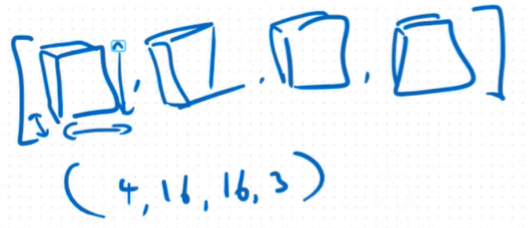

In [71]:
X_ori = torch.randn(4, 16, 16, 3)  # (B, H, W, C)
print('Shape of X_ori:', X_ori.shape)

Shape of X_ori: torch.Size([4, 16, 16, 3])


1.2  Reshape `X_ori` into a shape of `(4, 16*16*3)` = `(4, 768)` where each row represents a sample. Save the result as `X`.

    Expected ans:
    ```
    Shape of X: torch.Size([4, 768])
    ```

In [72]:
X = X_ori.view(4, -1)
print('Shape of X:', X.shape)

Shape of X: torch.Size([4, 768])


In [73]:
X = X_ori.view(X_ori.size(0), -1)
print('Shape of X:', X.shape)

Shape of X: torch.Size([4, 768])


In [75]:
print(X_ori.size())
print(X_ori.size(0))
print(X_ori.size(1))
print(X_ori.size(2))
print(X_ori.size(3))

torch.Size([4, 16, 16, 3])
4
16
16
3


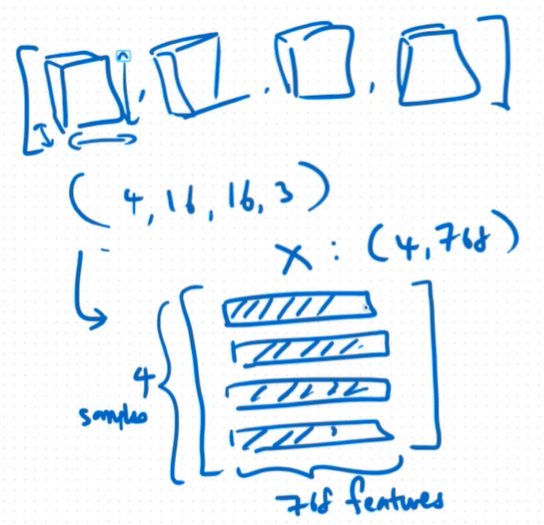

1.3  Check if a GPU is available in the system. If yes, transfer the tensor `X` to the GPU. Then, verify if X has really been loaded into the GPU (`X.is_cuda`) .

Expected ans:
```
X is loaded to GPU:0
```


In [80]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X = X.to(device)
print(X)
print("\nX is loaded to GPU:", X.is_cuda)

tensor([[ 0.1169, -1.3285,  1.6711,  ...,  0.4720,  1.2767, -0.3777],
        [-0.2417,  0.2584,  0.7530,  ..., -0.0586, -0.4904,  0.7540],
        [-1.4601, -0.1976,  0.3752,  ...,  1.2021,  2.0242,  0.6982],
        [ 1.1580,  0.1683,  0.7357,  ..., -0.9850, -0.9139, -0.0619]],
       device='cuda:0')

X is loaded to GPU: True


1.4 Generate a random weight tensor `W` of shape (768, 1) by sampling from a normal distribution. Create a scalar tensor for the bias `b` with value 0.

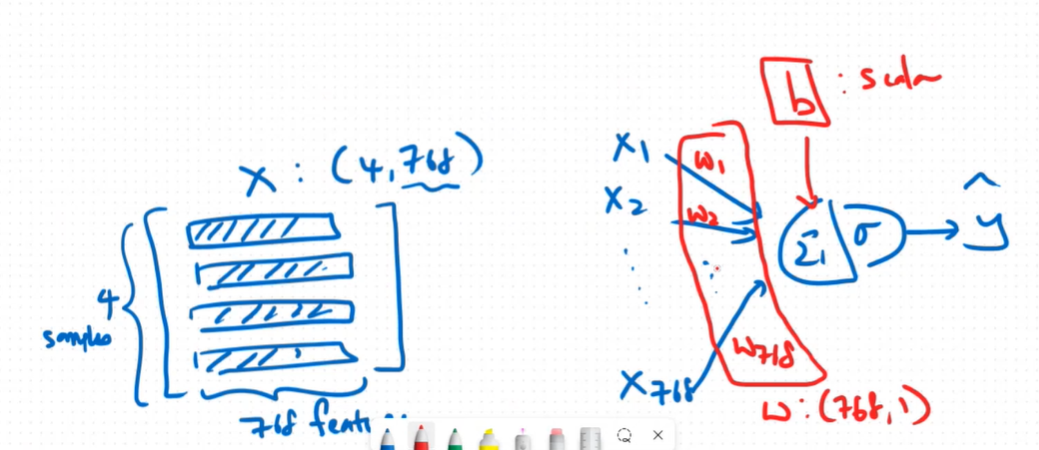

In [85]:
W = torch.randn(768, 1).to(device)
b = torch.tensor(0.).to(device)  # scalar
b2 = torch.tensor([0.])  # 1-D tensor with 1 item where the value is 0
b3 = torch.zeros(1)  # 1-D tensor with 1 item where the value is 0

print(f'{W.shape = }')
print(f'{b = }')
print(f'{b2 = }')
print(f'{b3 = }')

W.shape = torch.Size([768, 1])
b = tensor(0., device='cuda:0')
b2 = tensor([0.])
b3 = tensor([0.])


1.5 Implement the logistic regression to predict the input X.

The equation belows is matrix multiplication!

$$
\mathbf{z} = \mathbf{X}\mathbf{W} + \mathbf{b}
$$

$$
\hat{\mathbf{y}} = \frac{1}{1+e^\mathbf{-z}}
$$

if element-wise operation:

$$
\mathbf{z} = \mathbf{X}\bullet\mathbf{W} + \mathbf{b}
$$

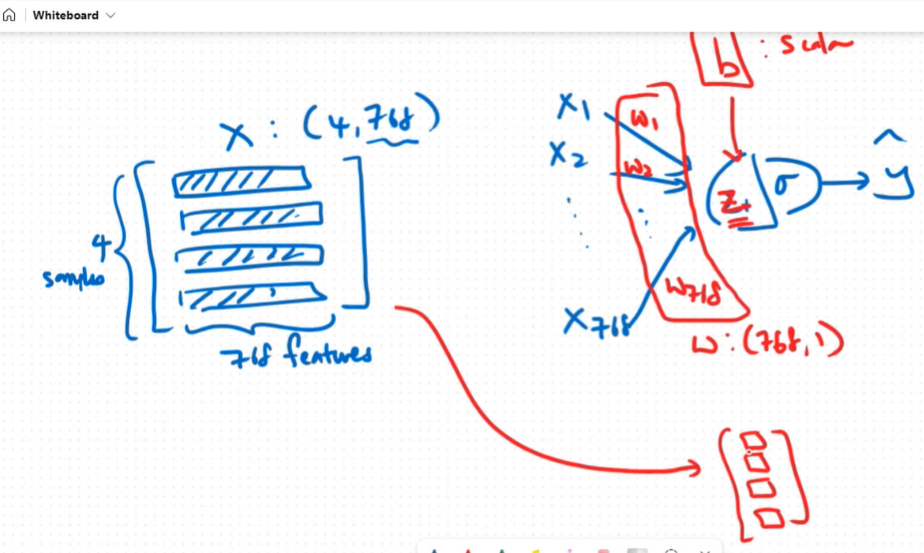

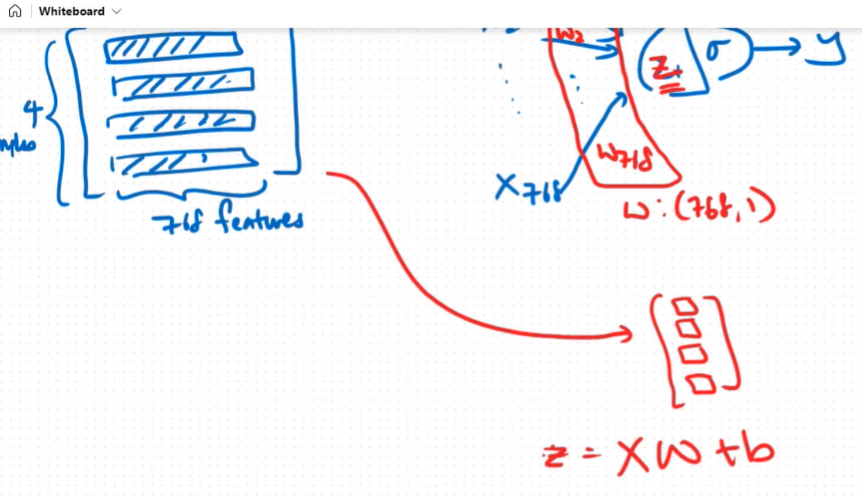

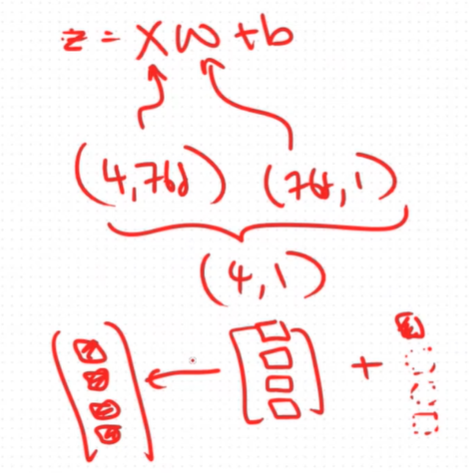

In [86]:
z = X @ W + b  # matrix multiplication (not element-wise)
print(f'{z = }')

yhat = 1 / (1 + torch.exp(-z))
print(f'{yhat = }')

z = tensor([[ 29.4350],
        [ -4.6249],
        [-14.3286],
        [  6.5959]], device='cuda:0')
yhat = tensor([[1.0000e+00],
        [9.7092e-03],
        [5.9865e-07],
        [9.9864e-01]], device='cuda:0')


---
**Question 2.**

2.1 Create the tensor `A`. Ensure that the datatype for `A` is `float32`.
``` python
    A = ((2, 3, 5, 6),
         (3, 2, 4, 1),
         (-1, -1, -1, -1),
         (5, 1, 10, 3),
         (-1, -1, -1, -1))
```

In [10]:
A = torch.tensor(((2, 3, 5, 6),
         (3, 2, 4, 1),
         (-1, -1, -1, -1),
         (5, 1, 10, 3),
         (-1, -1, -1, -1)), dtype = torch.float32)
print(A)

tensor([[ 2.,  3.,  5.,  6.],
        [ 3.,  2.,  4.,  1.],
        [-1., -1., -1., -1.],
        [ 5.,  1., 10.,  3.],
        [-1., -1., -1., -1.]])


2.2 Extract rows 0, 1 and 3.

Expected answer:
``` python
tensor([[ 2.,  3.,  5.,  6.],
        [ 3.,  2.,  4.,  1.],
        [ 5.,  1., 10.,  3.]])
```

In [11]:
selected = [0, 1, 3]
A = A[selected, :]
print(A)

tensor([[ 2.,  3.,  5.,  6.],
        [ 3.,  2.,  4.,  1.],
        [ 5.,  1., 10.,  3.]])


2.3 Compute the min and the max of the rows. Keep the dimensions.

Expected ans:
``` python
--- min of rows ---
 tensor([[2.],
        [1.],
        [1.]])

--- max of rows ---
 tensor([[ 6.],
        [ 4.],
        [10.]])
```

In [12]:
A.max(dim=1)  # (row (1), column (0))

torch.return_types.max(
values=tensor([ 6.,  4., 10.]),
indices=tensor([3, 2, 2]))

In [13]:
values, indices = A.max(dim=1) # (R, C)
print(values)
print(indices)

tensor([ 6.,  4., 10.])
tensor([3, 2, 2])


In [15]:
values, _ = A.max(dim=1, keepdim = True) # (R, C)
print(values)

tensor([[ 6.],
        [ 4.],
        [10.]])


In [17]:
# ... get min values for each row ...
min_vals, _ = A.min(dim=1, keepdim = True)

# ... get max values for each row...
max_vals, _ = A.max(dim=1, keepdim = True)

print('--- min of rows ---\n', min_vals)
print('\n--- max of rows ---\n', max_vals)

--- min of rows ---
 tensor([[2.],
        [1.],
        [1.]])

--- max of rows ---
 tensor([[ 6.],
        [ 4.],
        [10.]])


In [18]:
print(A)  # (3, 4)
print(min_vals)  # (3, 1)

A - min_vals  # broadcast along dim 0 --> (3, 4) - (3, 1) = (3, 4)

tensor([[ 2.,  3.,  5.,  6.],
        [ 3.,  2.,  4.,  1.],
        [ 5.,  1., 10.,  3.]])
tensor([[2.],
        [1.],
        [1.]])


tensor([[0., 1., 3., 4.],
        [2., 1., 3., 0.],
        [4., 0., 9., 2.]])

2.4 Normalize each row $i$ with the following equation:

$$
A_{norm}[i] = \frac{A[i] - \min(A[i])}{\max(A[i]) - \min(A[i])}
$$

Notes: you need to apply broadcasting for this operation.

Expected output:
``` python
tensor([[0.0000, 0.2500, 0.7500, 1.0000],
        [0.6667, 0.3333, 1.0000, 0.0000],
        [0.4444, 0.0000, 1.0000, 0.2222]])
```

In [19]:
A_norm = (A - min_vals) / (max_vals - min_vals)
print(A_norm)

tensor([[0.0000, 0.2500, 0.7500, 1.0000],
        [0.6667, 0.3333, 1.0000, 0.0000],
        [0.4444, 0.0000, 1.0000, 0.2222]])


<center> --- END OF LAB01 --- </center>